In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv('/home/abinash-bir/ML/datasets/Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [11]:
df.shape

(366, 12)

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    str    
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), str(1)
memory usage: 34.4 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [14]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [15]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='str')

In [16]:
df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='str')

In [17]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

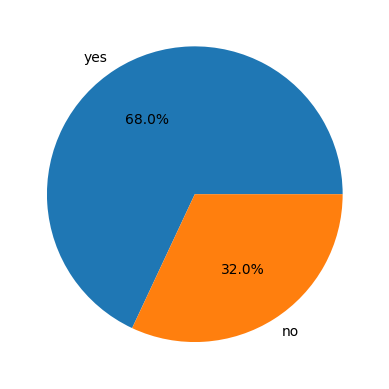

In [18]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [19]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [20]:
features = list(df.select_dtypes(include=np.number).columns)
if 'day' in features:
    features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


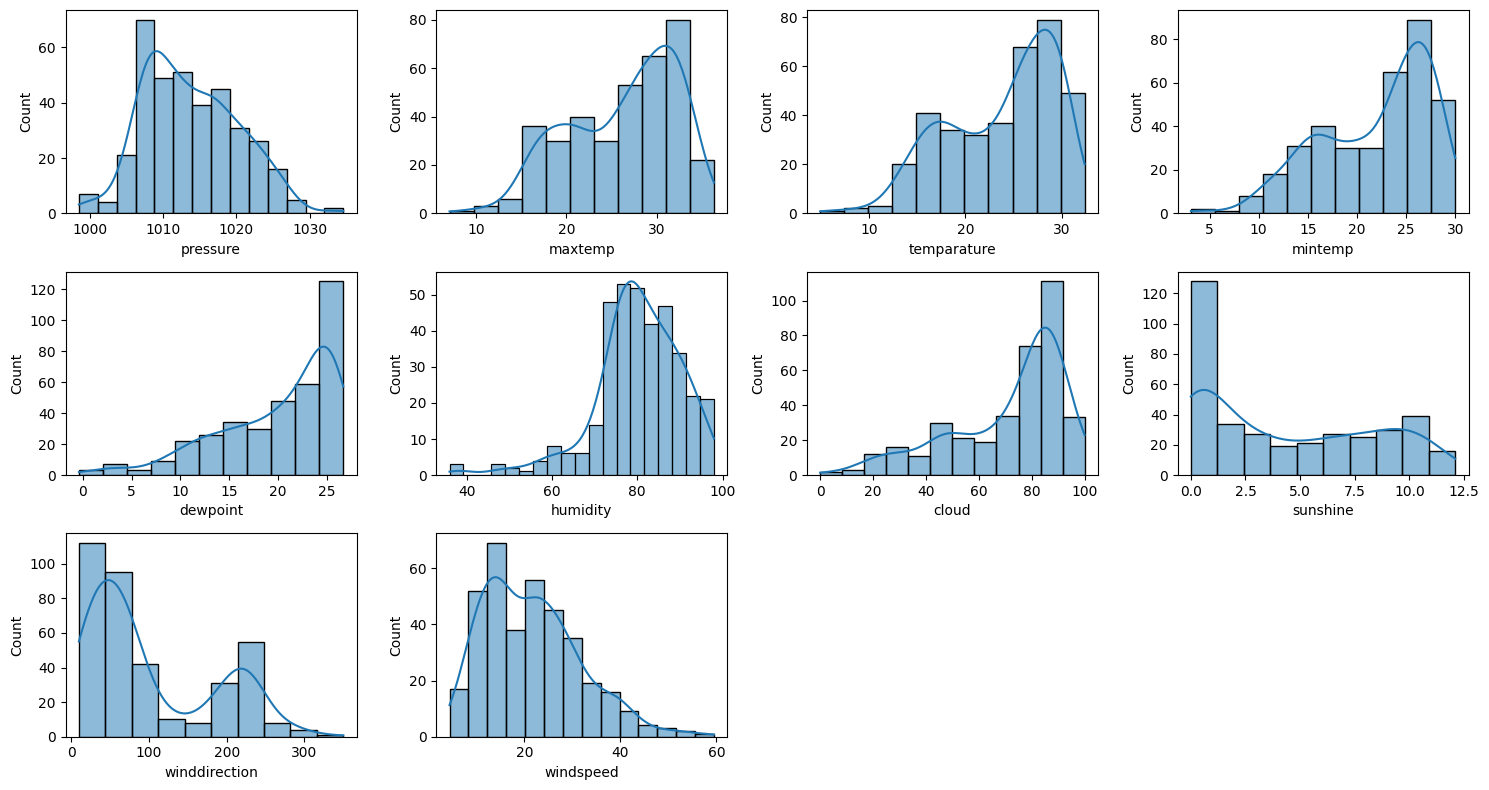

In [21]:
n = len(features)
cols = 4
rows = (n // cols) + 1

plt.figure(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sb.histplot(df[col], kde=True)

plt.tight_layout()
plt.show()

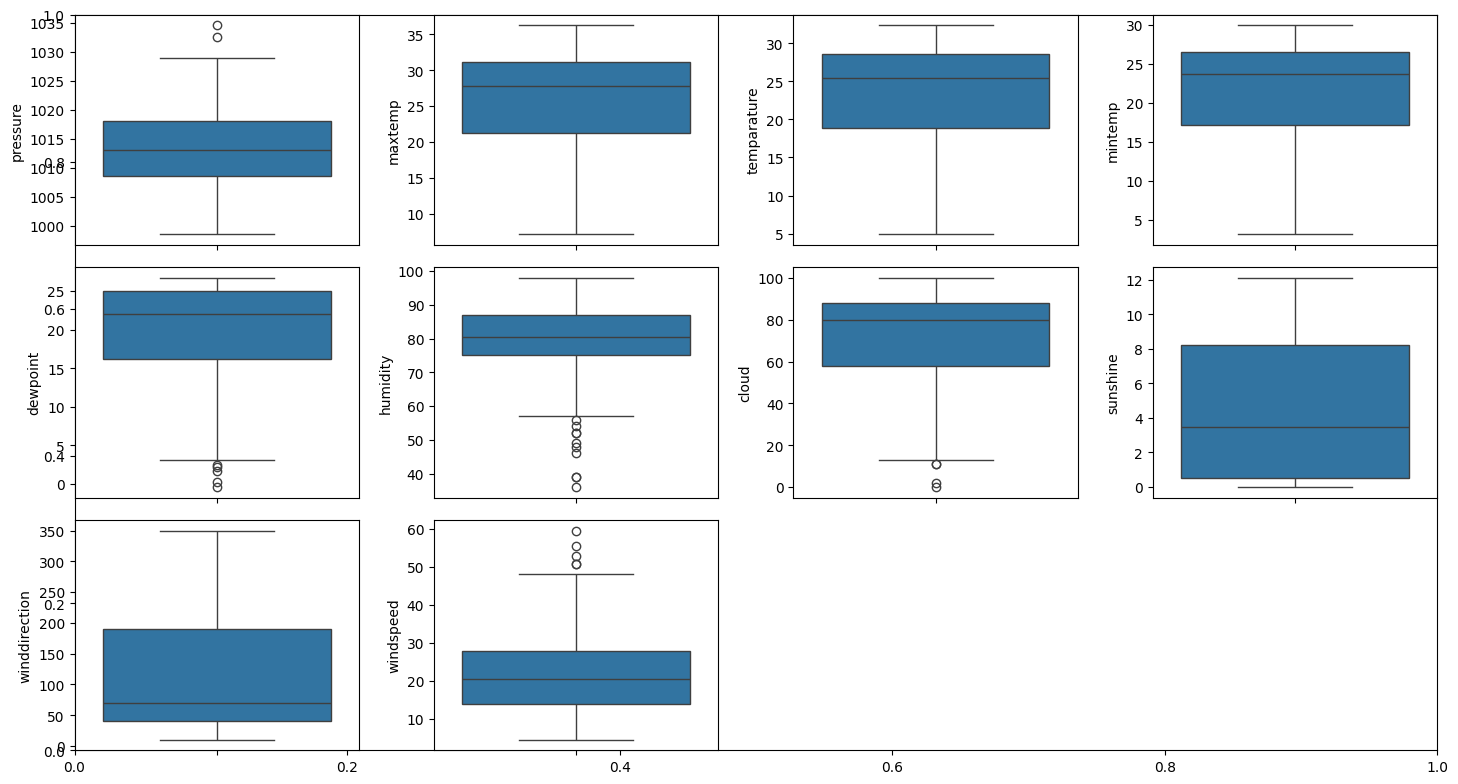

In [22]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [23]:
df['rainfall'] = df['rainfall'].map({'yes':1,'no':0})

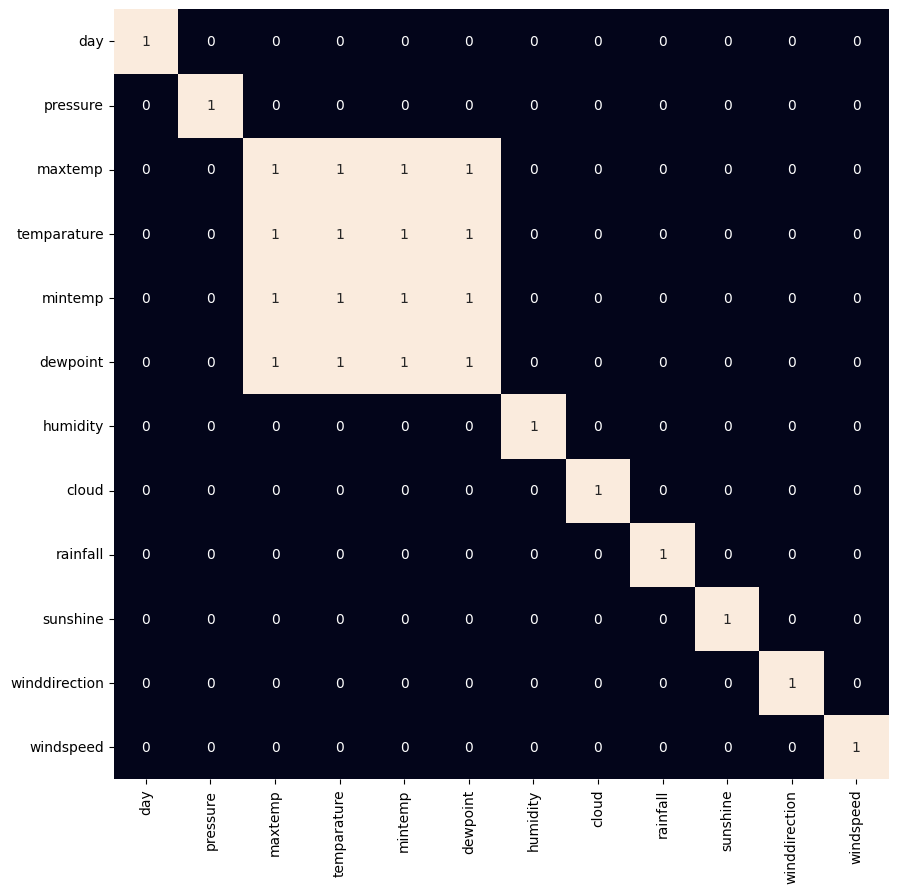

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [25]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [26]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [27]:
# print(Y_train.shape)
target.shape

(366,)

In [28]:
print(target.dtype)
print(set(target))


int64
{0, 1}


In [29]:
X_train, X_val, Y_train, Y_val = train_test_split(
    features,
    target,
    test_size=0.2,
    stratify=target,
    random_state=2
)

Y_train = Y_train.astype(int)

ros = RandomOverSampler(sampling_strategy='minority', random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

# Sampleing is done to balance the dataset

In [30]:
print(X_train.head())
print(X_val.head())

     pressure  temparature  dewpoint  humidity  cloud  sunshine  \
82     1012.8         18.4      18.0        97     95       0.6   
74     1017.1         14.8      11.1        79     94       0.0   
133    1012.4         25.5      22.2        82     88       1.2   
94     1012.5         23.6      21.4        88     84       2.2   
9      1017.5         18.0      15.5        85     91       0.0   

     winddirection  windspeed  
82            40.0       22.0  
74            70.0       38.0  
133           50.0       24.9  
94           120.0        8.0  
9             70.0       37.7  
     pressure  temparature  dewpoint  humidity  cloud  sunshine  \
269    1006.7         28.7      26.3        87     71       4.7   
243    1007.4         27.4      25.0        87     88       0.9   
149    1007.9         29.1      26.1        84     77       3.6   
331    1022.4         18.4       9.7        57     44       8.6   
254    1011.1         28.1      23.7        77     46       8.4   

  

In [31]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


models = [
    LogisticRegression(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier()
]

Y_val = Y_val.astype(int)

for model in models:
    model.fit(X, Y)

    print(model.__class__.__name__)

    train_preds = model.predict_proba(X)
    print("Training AUC:", metrics.roc_auc_score(Y, train_preds[:,1]))

    val_preds = model.predict_proba(X_val)
    print("Validation AUC:", metrics.roc_auc_score(Y_val, val_preds[:,1]))
    print("-"*40)

LogisticRegression
Training AUC: 0.8893209767430116
Validation AUC: 0.8966666666666667
----------------------------------------


XGBClassifier
Training AUC: 0.9999999999999999
Validation AUC: 0.8391666666666666
----------------------------------------
RandomForestClassifier
Training AUC: 1.0
Validation AUC: 0.8720833333333333
----------------------------------------
DecisionTreeClassifier
Training AUC: 1.0
Validation AUC: 0.7633333333333333
----------------------------------------
KNeighborsClassifier
Training AUC: 0.9467185172091613
Validation AUC: 0.8445833333333332
----------------------------------------
GradientBoostingClassifier
Training AUC: 0.9993181990353778
Validation AUC: 0.855
----------------------------------------


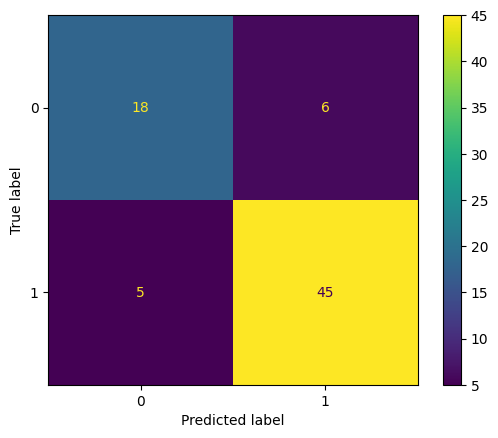

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_val, models[0].predict(X_val))
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [34]:
print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65        24
           1       0.82      0.90      0.86        50

    accuracy                           0.80        74
   macro avg       0.78      0.74      0.75        74
weighted avg       0.79      0.80      0.79        74

